Data Cleaning and Manipulation

In [4]:
import pandas as pd
food_df = pd.read_csv('datasets/food.csv')
menu_df = pd.read_csv('datasets/menu.csv')
orders_df = pd.read_csv('datasets/orders.csv')
restaurant_df = pd.read_csv('datasets/restaurant.csv')
users_df = pd.read_csv('datasets/users.csv')

/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_17783/159337376.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  menu_df = pd.read_csv('datasets/menu.csv')


In [6]:
food_df.isnull().sum()

Unnamed: 0        0
f_id              0
item              1
veg_or_non_veg    1
dtype: int64

In [7]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371561 entries, 0 to 371560
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      371561 non-null  int64 
 1   f_id            371561 non-null  object
 2   item            371560 non-null  object
 3   veg_or_non_veg  371560 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.3+ MB


In [8]:
food_df.dropna(inplace=True)
food_df = food_df.drop(columns=['Unnamed: 0'])

In [10]:
food_df.to_csv('cleaned_food.csv', index=False)

In [12]:
food_df.head()

,f_id,item,veg_or_non_veg
0,fd0,Aloo Tikki Burger,Veg
1,fd1,Veg Creamy Burger,Veg
2,fd2,Cheese Burst Burger,Veg
3,fd3,Paneer Creamy Burger,Veg
4,fd4,Maxican Burger,Veg


In [13]:
restaurant_df.isnull().sum()

Unnamed: 0        0
id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

In [14]:
restaurant_df_updated = restaurant_df.drop(['Unnamed: 0','lic_no', 'link', 'menu', 'address'], axis=1)

In [15]:
restaurant_df_updated.isnull().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
dtype: int64

In [16]:
restaurant_df_updated.dropna(inplace=True)

In [17]:
restaurant_df_updated.columns

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')

In [18]:
restaurant_df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148398 entries, 0 to 148540
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148398 non-null  int64 
 1   name          148398 non-null  object
 2   city          148398 non-null  object
 3   rating        148398 non-null  object
 4   rating_count  148398 non-null  object
 5   cost          148398 non-null  object
 6   cuisine       148398 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.1+ MB


In [19]:
restaurant_df_updated.head()

,id,name,city,rating,rating_count,cost,cuisine
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [20]:
restaurant_df_updated['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', '1.0', '1.2', '1.7'], dtype=object)

The code below shows how to change the values in the `rating` column to floats. If there are any missing values like `"--"`, they will be replaced with `0`

In [21]:
restaurant_df_updated['rating'] = restaurant_df_updated['rating'].replace('--', 0)
restaurant_df_updated['rating'] = restaurant_df_updated['rating'].astype(float)

Convert `cost` to Integer and Remove Original Column

In [22]:
restaurant_df_updated['avg_cost_for_a_meal'] = restaurant_df_updated['cost'].str.replace('₹ ', '').astype(int)
restaurant_df_updated = restaurant_df_updated.drop('cost', axis=1)

In [23]:
print(restaurant_df_updated['cuisine'].unique())

['Beverages,Pizzas' 'Sweets,Bakery' 'Beverages' ... 'Biryani,Thai'
 'South American,Andhra' 'Barbecue,Italian-American']


Split the `cuisine` column into two new columns.
`n=1`: Limits the split to the first occurrence of the delimiter, resulting in up to two parts.
`expand=True`: Expands the result into separate columns.

In [24]:
restaurant_df_updated[['cuisine_1', 'cuisine_2']] = restaurant_df_updated['cuisine'].str.split(',', n=1, expand=True)
restaurant_df_updated = restaurant_df_updated.drop('cuisine', axis=1)

Check for rows where `cuisine_2` column contains a comma(more than one cusine)

In [26]:
rows_with_commas = restaurant_df_updated[restaurant_df_updated['cuisine_2'].str.contains(',', na=False)]
print("Rows with commas in 'cuisine_2':")
print(rows_with_commas)

Rows with commas in 'cuisine_2':
Empty DataFrame
Columns: [id, name, city, rating, rating_count, avg_cost_for_a_meal, cuisine_1, cuisine_2]
Index: []


In [27]:
restaurant_df_updated['city'].unique()

array(['Abohar', 'Adilabad', 'Adityapur', 'Adoni', 'Agartala', 'Agra',
       'Vastrapur,Ahmedabad', 'GOTA,Ahmedabad',
       'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad',
       'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad',
       'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad',
       'Science City,Ahmedabad', 'Maninagar,Ahmedabad',
       'Chandkheda,Ahmedabad', 'Ahmednagar', 'Aizawl', 'Ajmer', 'Akola',
       'Alappuzha', 'Aligarh', 'Alipurduar', 'Allahabad', 'Alwar',
       'Ambala', 'Ambikapur', 'Ambur', 'Amravati', 'Amreli', 'Amritsar',
       'Anand', 'Anantapur', 'Ankleshwar', 'Arakkonam', 'Arambagh',
       'Arrah', 'Aruppukottai', 'Asansol', 'Aurangabad',
       'Aurangabad_bihar', 'Azamgarh', 'Baddi', 'Bagalkot', 'Bagdogra',
       'Bahadurgarh', 'Bahraich', 'Balaghat', 'Balangir', 'Balasore',
       'Ballari', 'Balrampur', 'Balurghat', 'Banda',
       'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore',
       'Koramangala,Bangalore', 'JP Nagar,B

In [28]:
restaurant_df_updated.head()

,id,name,city,rating,rating_count,avg_cost_for_a_meal,cuisine_1,cuisine_2
0,567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,200,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100,Beverages,None
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,0.0,Too Few Ratings,250,Italian-American,Fast Food


Grouping `cities` with a small number of `orders`

In [29]:
city =  restaurant_df_updated['city'].value_counts(ascending=False)
city

city
Bikaner                 1666
Noida-1                 1427
Indirapuram,Delhi       1279
BTM,Bangalore           1161
Rohini,Delhi            1135
                        ... 
Alwarpet,Chennai           1
Naharlagun                 1
Mahim Dadar,Mumbai         1
Starbucks_BKC,Mumbai       1
Rangpo                     1
Name: count, Length: 821, dtype: int64

In [30]:
city_less_than_10 = city[city<10]
def handle_city(value):
    if(value in city_less_than_10):
        return 'others'
    else:
        return value
    
restaurant_df_updated['city'] = restaurant_df_updated['city'].apply(handle_city)
restaurant_df_updated['city'].value_counts()

city
Bikaner              1666
Noida-1              1427
Indirapuram,Delhi    1279
BTM,Bangalore        1161
Rohini,Delhi         1135
                     ... 
Gadwal                 11
Lulu Mall,Kochi        11
Kothagudem             10
Mussoorie              10
Barwani                10
Name: count, Length: 775, dtype: int64

In [31]:
restaurant_df_updated.head()

,id,name,city,rating,rating_count,avg_cost_for_a_meal,cuisine_1,cuisine_2
0,567335,AB FOODS POINT,Abohar,0.0,Too Few Ratings,200,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100,Beverages,None
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,0.0,Too Few Ratings,250,Italian-American,Fast Food


Cleaning `city` column by removing all information except the `city name`

In [115]:
ind_city = []
for city in restaurant_df_updated['city'].unique():
    ind_city.append(city)
# Find values with commas
values_with_commas = [value for value in ind_city if ',' in value]
print("Values with commas:", values_with_commas)

Values with commas: ['Vastrapur,Ahmedabad', 'GOTA,Ahmedabad', 'Paldi & Ambawadi,Ahmedabad', 'Ghatlodia,Ahmedabad', 'Bopal,Ahmedabad', 'Gandhinagar,Ahmedabad', 'LalDarwaja,Ahmedabad', 'Naranpura,Ahmedabad', 'Navrangpura,Ahmedabad', 'Maninagar,Ahmedabad', 'Chandkheda,Ahmedabad', 'Yeshwanthpur,Bangalore', 'Geddalahalli,Bangalore', 'Koramangala,Bangalore', 'JP Nagar,Bangalore', 'Mahadevpura,Bangalore', 'HSR,Bangalore', 'Arekere,Bangalore', 'Indiranagar,Bangalore', 'Banashankari,Bangalore', 'Whitefield,Bangalore', 'Nagavara & Hennur,Bangalore', 'Kammanahalli/Kalyan Nagar,Bangalore', 'Kumaraswamy Layout & Uttarahalli,Bangalore', 'BTM,Bangalore', 'Battarahalli,Bangalore', 'Basaveshwaranagar,Bangalore', 'Frazer Town,Bangalore', 'Sanjay Nagar, New BEL Road,Bangalore', 'Yelahanka,Bangalore', 'Majestic,Bangalore', 'Kanakapura Road,Bangalore', 'R.T. Nagar,Bangalore', 'Kadugodi,Bangalore', 'Marathahalli,Bangalore', 'Rajarajeshwari Nagar,Bangalore', 'CV Raman Nagar,Bangalore', 'Electronic City,Banga

In [117]:
def process_city(value):
    if ',' in value:
        return value.split(',', 1)[1].strip()  # Remove everything before and including the comma
    return value

# Apply the function to the 'city' column
restaurant_df_updated['city'] = restaurant_df_updated['city'].apply(process_city)

In [119]:
restaurant_df_updated.to_csv('cleaned_restaurant_df.csv', index=False)

In [33]:
menu_df.isnull().sum()

Unnamed: 0    0
menu_id       0
r_id          0
f_id          0
cuisine       0
price         0
dtype: int64

In [34]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179936 entries, 0 to 1179935
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1179936 non-null  int64 
 1   menu_id     1179936 non-null  object
 2   r_id        1179936 non-null  int64 
 3   f_id        1179936 non-null  object
 4   cuisine     1179936 non-null  object
 5   price       1179936 non-null  object
dtypes: int64(2), object(4)
memory usage: 54.0+ MB


In [35]:
menu_df_updated = menu_df.rename(columns={'Unnamed: 0': 'id'})
menu_df_updated[['cuisine_1', 'cuisine_2']] = menu_df_updated['cuisine'].str.split(',', n=1, expand=True)
menu_df_updated = menu_df_updated.drop('cuisine', axis=1)

In [39]:
menu_df_updated.head()

,id,menu_id,r_id,f_id,price,cuisine_1,cuisine_2
0,0,mn0,567335,fd0,40.0,Beverages,Pizzas
1,1,mn0,567335,fd669322,40.0,Beverages,Pizzas
2,2,mn328,158203,fd0,65.0,Beverages,None
3,3,mn328,158203,fd669322,65.0,Beverages,None
4,4,mn449,158203,fd0,65.0,Beverages,None


Convert `price` column to numeric and remove rows with non-numeric values

In [41]:
# Convert to numeric, forcing errors to NaN
menu_df_updated['price_numeric'] = pd.to_numeric(menu_df_updated['price'], errors='coerce')

# Identify rows where conversion resulted in NaN
non_convertible = menu_df_updated[menu_df_updated['price_numeric'].isna()]

# Remove rows with NaN values in 'price_numeric'
menu_df_cleaned = menu_df_updated.dropna(subset=['price_numeric'])

# Drop the temporary 'price_numeric' column if
menu_df_cleaned = menu_df_cleaned.drop(columns=['price_numeric'])
menu_df_cleaned


,id,menu_id,r_id,f_id,price,cuisine_1,cuisine_2
0,0,mn0,567335,fd0,40.0,Beverages,Pizzas
1,1,mn0,567335,fd669322,40.0,Beverages,Pizzas
2,2,mn328,158203,fd0,65.0,Beverages,None
3,3,mn328,158203,fd669322,65.0,Beverages,None
4,4,mn449,158203,fd0,65.0,Beverages,None
...,...,...,...,...,...,...,...
1179931,1179931,mn1048555,96525,fd1048555,300.0,Ice Cream,Desserts
1179932,1179932,mn1048556,96525,fd1048556,300.0,Ice Cream,Desserts
1179933,1179933,mn1048558,96525,fd1048558,350.0,Ice Cream,Desserts
1179934,1179934,mn1048561,96525,fd1048561,200.0,Ice Cream,Desserts


In [42]:
menu_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1178743 entries, 0 to 1179935
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1178743 non-null  int64 
 1   menu_id    1178743 non-null  object
 2   r_id       1178743 non-null  int64 
 3   f_id       1178743 non-null  object
 4   price      1178743 non-null  object
 5   cuisine_1  1178743 non-null  object
 6   cuisine_2  937985 non-null   object
dtypes: int64(2), object(5)
memory usage: 71.9+ MB


Check for rows where `cuisine_2` column contains a comma(more than one cusine)

In [44]:
rows_with_commas = menu_df_cleaned[menu_df_cleaned['cuisine_2'].str.contains(',', na=False)]
print("Rows with commas in 'cuisine_2':")
print(rows_with_commas)

Rows with commas in 'cuisine_2':
Empty DataFrame
Columns: [id, menu_id, r_id, f_id, price, cuisine_1, cuisine_2]
Index: []


In [45]:
menu_df_cleaned.head()

,id,menu_id,r_id,f_id,price,cuisine_1,cuisine_2
0,0,mn0,567335,fd0,40.0,Beverages,Pizzas
1,1,mn0,567335,fd669322,40.0,Beverages,Pizzas
2,2,mn328,158203,fd0,65.0,Beverages,None
3,3,mn328,158203,fd669322,65.0,Beverages,None
4,4,mn449,158203,fd0,65.0,Beverages,None


In [46]:
menu_df_cleaned.to_csv('cleaned_menu_df.csv', index=False)

In [47]:
orders_df.head()

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335.0
1,1,2018-05-08,3,-1,INR,77359,531342.0
2,2,2018-04-06,1,875,INR,5321,158203.0
3,3,2018-04-11,1,583,INR,21343,187912.0
4,4,2018-06-18,6,7176,INR,75378,543530.0


In [48]:
orders_df.isnull().sum()

Unnamed: 0         0
order_date         0
sales_qty          0
sales_amount       0
currency           0
user_id            0
r_id            1617
dtype: int64

In [49]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    150281 non-null  int64  
 1   order_date    150281 non-null  object 
 2   sales_qty     150281 non-null  int64  
 3   sales_amount  150281 non-null  int64  
 4   currency      150281 non-null  object 
 5   user_id       150281 non-null  int64  
 6   r_id          148664 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 8.0+ MB


Convert `order_date` to datetime

In [50]:
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'], errors='coerce')

In [51]:
orders_df

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335.0
1,1,2018-05-08,3,-1,INR,77359,531342.0
2,2,2018-04-06,1,875,INR,5321,158203.0
3,3,2018-04-11,1,583,INR,21343,187912.0
4,4,2018-06-18,6,7176,INR,75378,543530.0
...,...,...,...,...,...,...,...
150276,150276,2019-04-18,1,394,INR\r,79856,NaN
150277,150277,2019-04-23,1,667,INR\r,65798,NaN
150278,150278,2019-04-23,1,625,INR\r,49176,NaN
150279,150279,2019-04-24,7,8625,INR\r,87924,NaN


Filter out rows where `sales_qty` or `sales_amount` have negative values

In [52]:
cleaned_orders_df = orders_df[(orders_df['sales_qty'] >= 0) & (orders_df['sales_amount'] >= 0)]
cleaned_orders_df.rename(columns={"Unnamed: 0": "order_id"}, inplace=True)

/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_17783/3335402645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_orders_df.rename(columns={"Unnamed: 0": "order_id"}, inplace=True)


Drop rows in `orders_df` where `orders` don't contain info about `restaurant` and convert column to int 

In [53]:
# Drop rows where 'r_id' column has NaN values
cleaned_orders_df = cleaned_orders_df.dropna(subset=['r_id'])

# Change the data type of 'r_id' column to int
cleaned_orders_df['r_id'] = cleaned_orders_df['r_id'].astype(int)

In [54]:
cleaned_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148662 entries, 0 to 148663
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      148662 non-null  int64         
 1   order_date    148662 non-null  datetime64[ns]
 2   sales_qty     148662 non-null  int64         
 3   sales_amount  148662 non-null  int64         
 4   currency      148662 non-null  object        
 5   user_id       148662 non-null  int64         
 6   r_id          148662 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 9.1+ MB


In [55]:
cleaned_orders_df

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335
2,2,2018-04-06,1,875,INR,5321,158203
3,3,2018-04-11,1,583,INR,21343,187912
4,4,2018-06-18,6,7176,INR,75378,543530
5,5,2017-11-20,59,500,USD,34323,158204
...,...,...,...,...,...,...,...
148659,148659,2019-03-15,1,1630,INR\r,25901,390478
148660,148660,2019-03-15,1,2611,INR\r,97820,103649
148661,148661,2019-03-15,7,10458,INR\r,6041,430451
148662,148662,2019-03-18,1,713,INR\r,81310,518548


Update values like `INR\r` to `INR`

In [56]:
cleaned_orders_df['currency'] = cleaned_orders_df['currency'].str.strip()  # Remove leading and trailing whitespace, including carriage returns

Remove rows with unnecessary values

In [57]:
usd_count = cleaned_orders_df[cleaned_orders_df['currency'] == 'USD'].shape[0]
usd_count

2

In [58]:
cleaned_orders_df = cleaned_orders_df[cleaned_orders_df['currency'] != 'USD']

In [59]:
cleaned_orders_df

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335
2,2,2018-04-06,1,875,INR,5321,158203
3,3,2018-04-11,1,583,INR,21343,187912
4,4,2018-06-18,6,7176,INR,75378,543530
7,7,2017-11-23,39,21412,INR,87420,244866
...,...,...,...,...,...,...,...
148659,148659,2019-03-15,1,1630,INR,25901,390478
148660,148660,2019-03-15,1,2611,INR,97820,103649
148661,148661,2019-03-15,7,10458,INR,6041,430451
148662,148662,2019-03-18,1,713,INR,81310,518548


In [60]:
cleaned_orders_df.to_csv('cleaned_orders_df.csv', index=False)

In [61]:
users_df.isnull().sum()

Unnamed: 0                    0
user_id                       0
name                          0
email                         0
password                      0
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
dtype: int64

In [62]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Unnamed: 0                  100000 non-null  int64 
 1   user_id                     100000 non-null  int64 
 2   name                        100000 non-null  object
 3   email                       100000 non-null  object
 4   password                    100000 non-null  object
 5   Age                         100000 non-null  int64 
 6   Gender                      100000 non-null  object
 7   Marital Status              100000 non-null  object
 8   Occupation                  100000 non-null  object
 9   Monthly Income              100000 non-null  object
 10  Educational Qualifications  100000 non-null  object
 11  Family size                 100000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.2+ MB


In [63]:
users_df_updated = users_df.drop(['Unnamed: 0','email','password'], axis=1)

In [64]:
users_df_updated['Family size'].unique()

array([4, 3, 6, 2, 5, 1])

In [65]:
users_df_updated.to_csv('cleaned_users_df.csv', index=False)

In [66]:
users_df_updated.head()

,user_id,name,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size
0,1,Claire Ferguson,20,Female,Single,Student,No Income,Post Graduate,4
1,2,Jennifer Young,24,Female,Single,Student,Below Rs.10000,Graduate,3
2,3,Jermaine Roberson,22,Male,Single,Student,Below Rs.10000,Post Graduate,3
3,4,Rachel Carpenter,22,Female,Single,Student,No Income,Graduate,6
4,5,Shawn Parker,22,Male,Single,Student,Below Rs.10000,Post Graduate,4


Data Analysis

Descriptive Statistics

In [67]:
# Descriptive statistics for sales
print(cleaned_orders_df[['sales_qty', 'sales_amount']].describe())
print("-------------------------------------")

# Descriptive statistics for restaurant ratings
print(restaurant_df_updated['rating'].describe())
print("-------------------------------------")
# Descriptive statistics for user demographics
print(users_df_updated[['Age', 'Monthly Income', 'Family size']].describe())
print("-------------------------------------")

           sales_qty  sales_amount
count  148660.000000  1.486600e+05
mean       16.354971  6.486335e+03
std       115.359442  2.976550e+04
min         1.000000  0.000000e+00
25%         1.000000  1.670000e+02
50%         1.000000  4.950000e+02
75%         7.000000  2.963000e+03
max     14049.000000  1.510944e+06
-------------------------------------
count    148398.000000
mean          1.611930
std           1.940886
min           0.000000
25%           0.000000
50%           0.000000
75%           3.800000
max           5.000000
Name: rating, dtype: float64
-------------------------------------
                 Age    Family size
count  100000.000000  100000.000000
mean       24.628580       3.280990
std         2.971743       1.349242
min        18.000000       1.000000
25%        23.000000       2.000000
50%        24.000000       3.000000
75%        26.000000       4.000000
max        33.000000       6.000000
-------------------------------------


Inferential Statistics and Hypothesis Testing

Does price affect sales amount?

In [68]:
from scipy import stats

# Merge menu and orders data
merged_df = pd.merge(cleaned_orders_df, menu_df_cleaned, left_on='r_id', right_on='r_id')
merged_df['price'] = merged_df['price'].astype(float)
merged_df.head()

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id,id,menu_id,f_id,price,cuisine_1,cuisine_2
0,0,2017-10-10,100,41241,INR,49226,567335,0,mn0,fd0,40.0,Beverages,Pizzas
1,0,2017-10-10,100,41241,INR,49226,567335,1,mn0,fd669322,40.0,Beverages,Pizzas
2,0,2017-10-10,100,41241,INR,49226,567335,976,mn1,fd1,50.0,Beverages,Pizzas
3,0,2017-10-10,100,41241,INR,49226,567335,983,mn2,fd2,65.0,Beverages,Pizzas
4,0,2017-10-10,100,41241,INR,49226,567335,1003,mn3,fd3,80.0,Beverages,Pizzas


In [69]:
# Perform correlation test
correlation, p_value = stats.pearsonr(merged_df['price'], merged_df['sales_amount'])
print(f'Correlation: {correlation}, P-value: {p_value}')

Correlation: 0.0031873350642278382, P-value: 0.0004971595199835391


In [70]:
# Hypothesis testing: t-test for comparing sales before and after a price increase
sales_before = merged_df[merged_df['price'] < 150]['sales_amount']
sales_after = merged_df[merged_df['price'] >= 150]['sales_amount']
t_stat, p_val = stats.ttest_ind(sales_before, sales_after)
print(f'T-statistic: {t_stat}, P-value: {p_val}')

T-statistic: -2.040730630012955, P-value: 0.04127782860088194


------

------

In [126]:
import matplotlib.pyplot as plt

In [84]:
cleaned_orders_df.head()

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id
0,0,2017-10-10,100,41241,INR,49226,567335
2,2,2018-04-06,1,875,INR,5321,158203
3,3,2018-04-11,1,583,INR,21343,187912
4,4,2018-06-18,6,7176,INR,75378,543530
7,7,2017-11-23,39,21412,INR,87420,244866


In [85]:
# Extract day of the week and month
cleaned_orders_df['day_of_week'] = cleaned_orders_df['order_date'].dt.day_name()
cleaned_orders_df['month'] = cleaned_orders_df['order_date'].dt.month_name()

/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_17783/2647476838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_orders_df['day_of_week'] = cleaned_orders_df['order_date'].dt.day_name()
/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_17783/2647476838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_orders_df['month'] = cleaned_orders_df['order_date'].dt.month_name()


In [86]:
cleaned_orders_df.head()

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id,day_of_week,month
0,0,2017-10-10,100,41241,INR,49226,567335,Tuesday,October
2,2,2018-04-06,1,875,INR,5321,158203,Friday,April
3,3,2018-04-11,1,583,INR,21343,187912,Wednesday,April
4,4,2018-06-18,6,7176,INR,75378,543530,Monday,June
7,7,2017-11-23,39,21412,INR,87420,244866,Thursday,November


In [87]:
# Aggregate sales data by day of the week
weekly_sales = cleaned_orders_df.groupby('day_of_week').agg({'sales_amount': 'sum'}).reset_index()
weekly_sales = weekly_sales.sort_values('sales_amount', ascending=False)

In [88]:
weekly_sales

,day_of_week,sales_amount
0,Friday,257328388
4,Thursday,185129232
6,Wednesday,183625650
5,Tuesday,174494522
1,Monday,162020643
2,Saturday,1339481
3,Sunday,320611


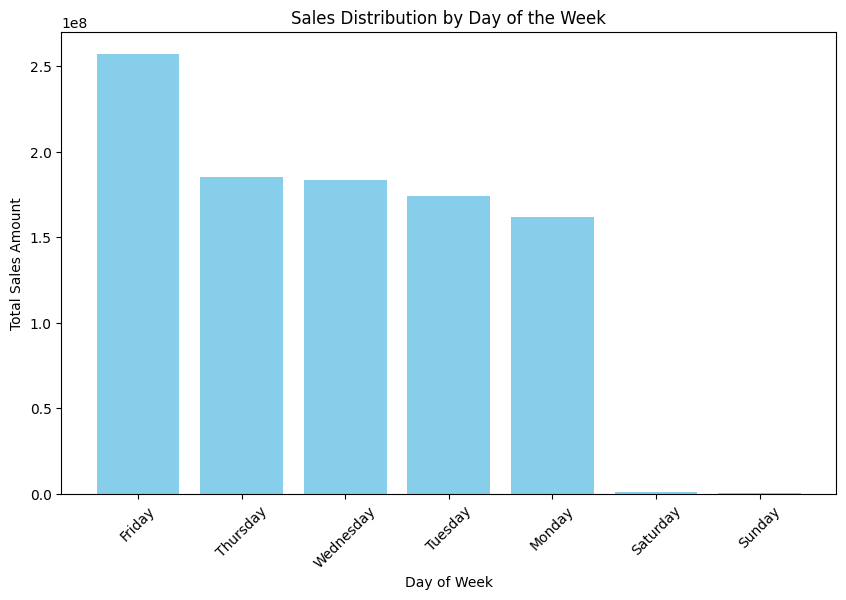

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(weekly_sales['day_of_week'], weekly_sales['sales_amount'], color='skyblue')
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


In [129]:
# Prepare data for ANOVA
sales_by_day = [group['sales_amount'].values for name, group in cleaned_orders_df.groupby('day_of_week')]

# Conduct ANOVA
f_stat, p_val = stats.f_oneway(*sales_by_day)
print(f'F-statistic: {f_stat:.2f}, P-value: {p_val:.4f}')

F-statistic: 8.32, P-value: 0.0000


 Sales Distribution by Month

In [91]:
# Aggregate sales data by month
monthly_sales = cleaned_orders_df.groupby('month').agg({'sales_amount': 'sum'}).reset_index()
monthly_sales = monthly_sales.sort_values('sales_amount', ascending=False)

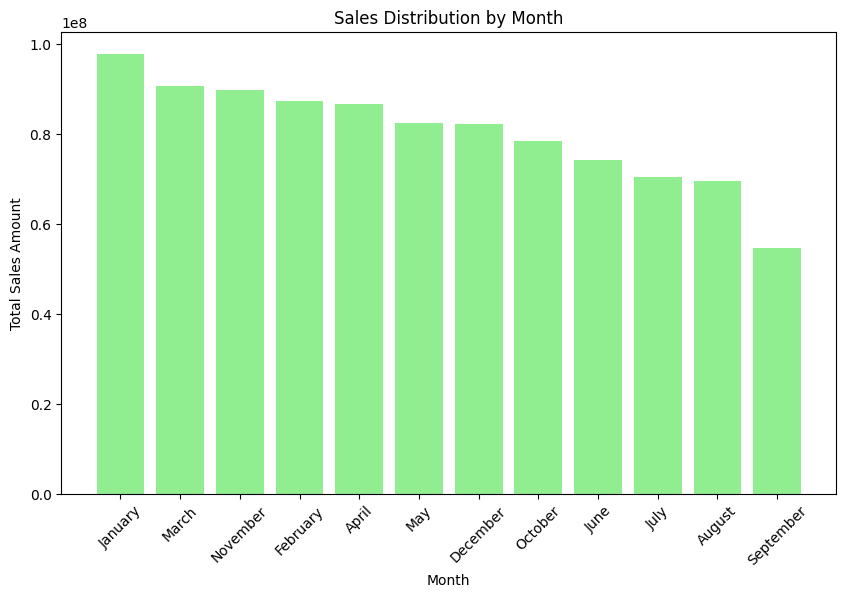

In [92]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['month'], monthly_sales['sales_amount'], color='lightgreen')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

-----------------

Calculate the `Average Sales Amount` Per `Order`

In [101]:
cleaned_orders_df['avg_sales_per_order'] = cleaned_orders_df['sales_amount'] / cleaned_orders_df['sales_qty']
average_sales_per_order = cleaned_orders_df['avg_sales_per_order'].mean()
print(f"Average Sales Amount Per Order: {average_sales_per_order}")

Average Sales Amount Per Order: 446.8911812754207


/var/folders/8h/hbj9kb412sz4vmszf826vrrc0000gn/T/ipykernel_17783/1550118098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_orders_df['avg_sales_per_order'] = cleaned_orders_df['sales_amount'] / cleaned_orders_df['sales_qty']


In [102]:
cleaned_orders_df.head()

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id,day_of_week,month,avg_sales_per_order
0,0,2017-10-10,100,41241,INR,49226,567335,Tuesday,October,412.410000
2,2,2018-04-06,1,875,INR,5321,158203,Friday,April,875.000000
3,3,2018-04-11,1,583,INR,21343,187912,Wednesday,April,583.000000
4,4,2018-06-18,6,7176,INR,75378,543530,Monday,June,1196.000000
7,7,2017-11-23,39,21412,INR,87420,244866,Thursday,November,549.025641


------------------------------------------------------------------------


`Time series analysis` on the `sales` data

In [122]:
cleaned_orders_df.head()

,order_id,order_date,sales_qty,sales_amount,currency,user_id,r_id,day_of_week,month,avg_sales_per_order
0,0,2017-10-10,100,41241,INR,49226,567335,Tuesday,October,412.410000
2,2,2018-04-06,1,875,INR,5321,158203,Friday,April,875.000000
3,3,2018-04-11,1,583,INR,21343,187912,Wednesday,April,583.000000
4,4,2018-06-18,6,7176,INR,75378,543530,Monday,June,1196.000000
7,7,2017-11-23,39,21412,INR,87420,244866,Thursday,November,549.025641


In [123]:
daily_sales = cleaned_orders_df.groupby('order_date').agg({
    'sales_qty': 'sum',
    'sales_amount': 'sum'
}).reset_index()

In [124]:
daily_sales.head()

,order_date,sales_qty,sales_amount
0,2017-10-04,139,68643
1,2017-10-05,944,438805
2,2017-10-06,1459,703071
3,2017-10-09,2424,452029
4,2017-10-10,3091,1607039


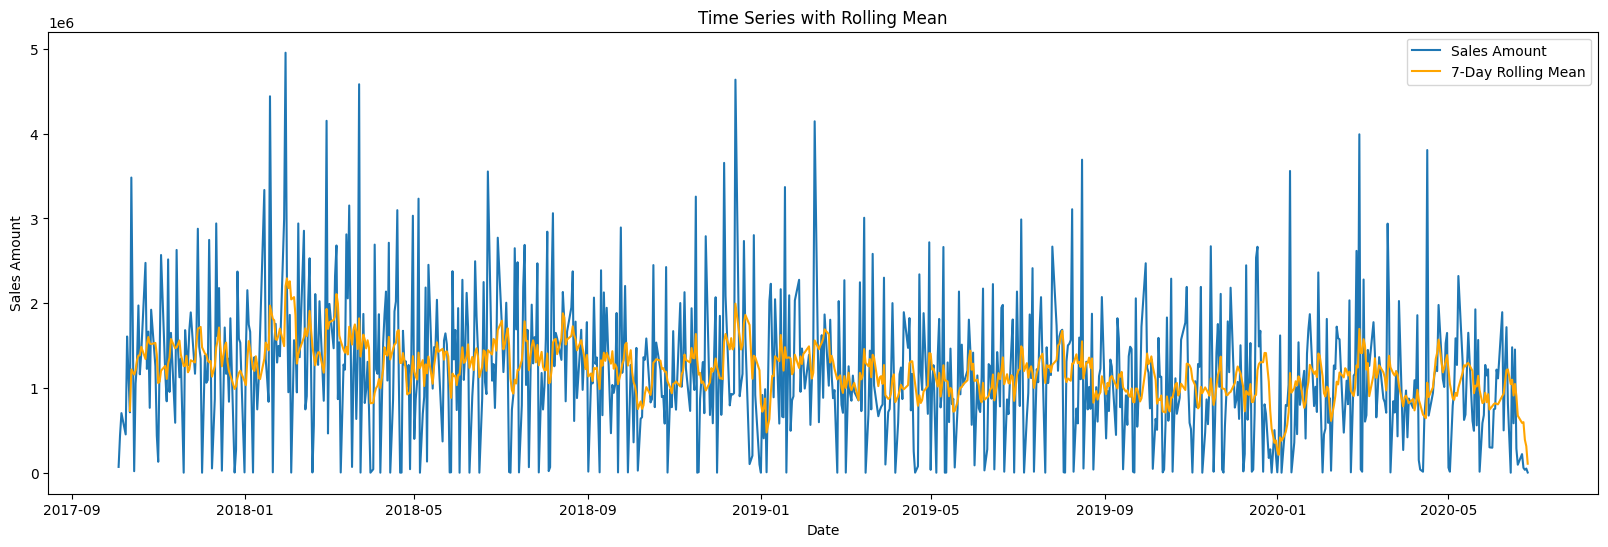

In [128]:
daily_sales['rolling_mean'] = daily_sales['sales_amount'].rolling(window=7).mean()

plt.figure(figsize=(20, 6))
plt.plot(daily_sales['order_date'], daily_sales['sales_amount'], label='Sales Amount')
plt.plot(daily_sales['order_date'], daily_sales['rolling_mean'], label='7-Day Rolling Mean', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Time Series with Rolling Mean')
plt.legend()
plt.show()


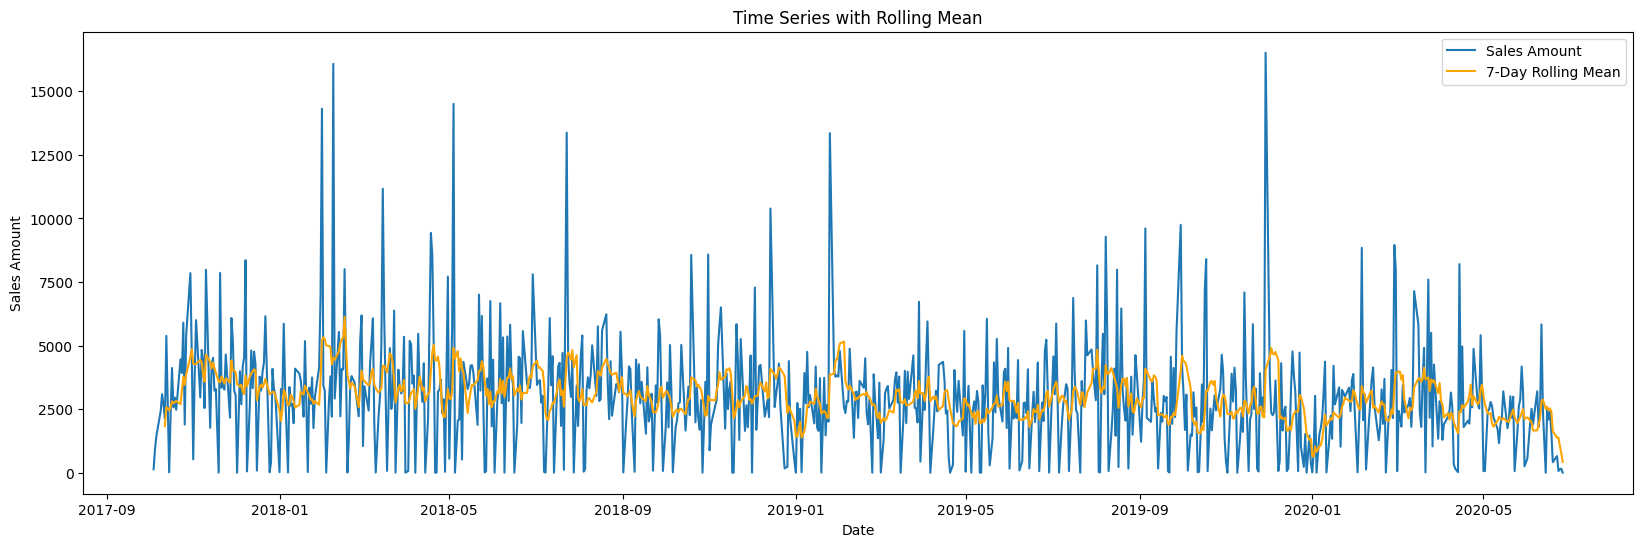

In [127]:
daily_sales['rolling_mean_quantity'] = daily_sales['sales_qty'].rolling(window=7).mean()

plt.figure(figsize=(20, 6))
plt.plot(daily_sales['order_date'], daily_sales['sales_qty'], label='Sales Amount')
plt.plot(daily_sales['order_date'], daily_sales['rolling_mean_quantity'], label='7-Day Rolling Mean', color='orange')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Time Series with Rolling Mean')
plt.legend()
plt.show()